In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Check

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/home-data-for-ml-course/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/home-data-for-ml-course/test.csv')

In [97]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [99]:
train_data.info() #object타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [100]:
# train데이터 shape
train_data.shape

(1460, 81)

In [101]:
# train데이터의 type 개수
train_data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Tip
- 파이썬에서는 Null,NA 값 모두 같은 의미로 사용되는 것을 알아두자. (R에서는 좀 다른듯)
  - NaN(NA)로 Na와 null모두 표현 가능

In [0]:
# Null값이 너무 많은 feature는 Drop을 시키자.
#print(train_data.isnull().sum())
is_null_series = train_data.isnull().sum()
is_null_series[is_null_series>0].sort_values(ascending=False) # ascending=True 오름차순

# Null값 500개 이상 제거
train_data=train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [103]:
print(train_data.shape)
is_null_series = train_data.isnull().sum()
print(is_null_series[is_null_series>0].sort_values(ascending=False))

'''
제거가 된 것을 알 수 있음
axis= 1 : 컬럼(열))
axis= 0 : 로우(행)
'''

(1460, 76)
LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64


'\n제거가 된 것을 알 수 있음\naxis= 1 : 컬럼(열))\naxis= 0 : 로우(행)\n'

# Graph
- Figure : 그래프가 그려질 전체 도화지라고 생각하면 됨 Figure 안에 axes가 존재
- Axes: figure 안에 위치하는 하나의 그래프를 의미

### 1. Style

Tip

회귀 모델을 적용하기 전에 타깃 값의 분포도가 정규분포인지 확인해야함

Tip
- plt.figure: 새로운 figure 생성

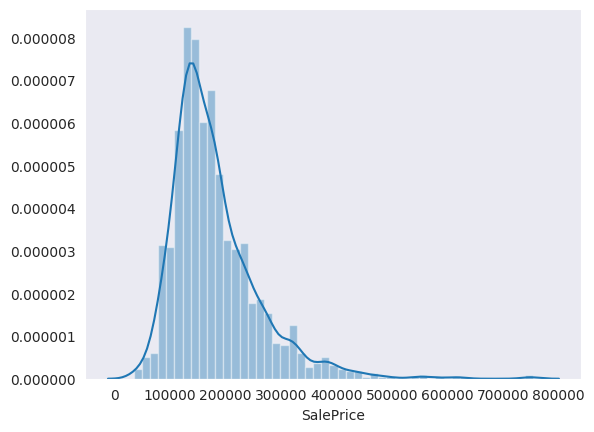

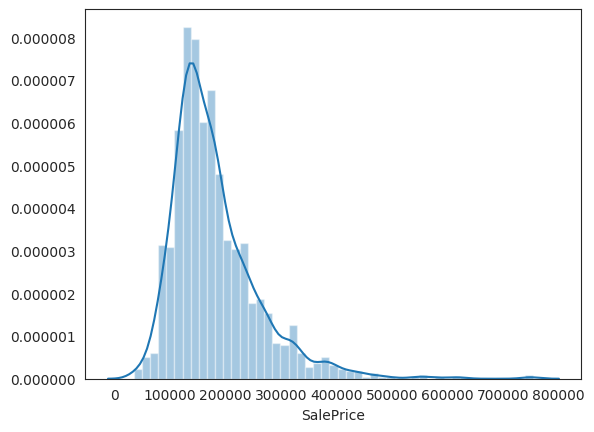

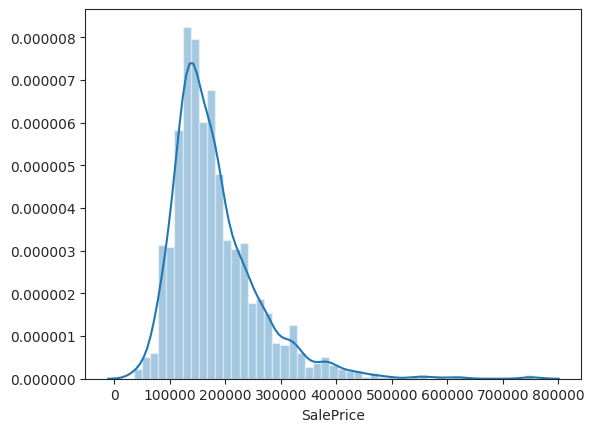

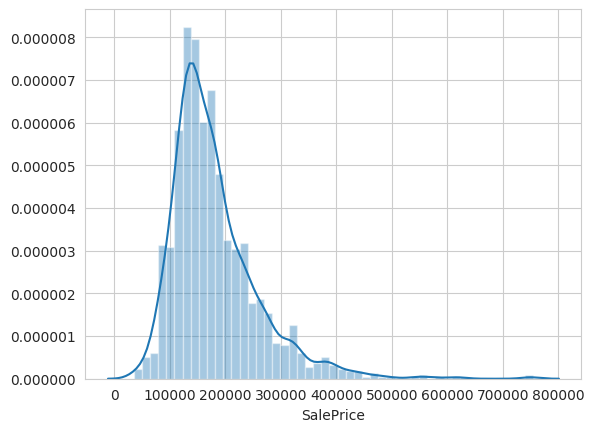

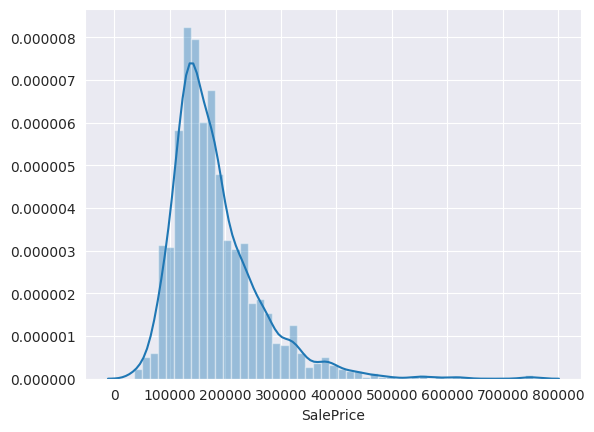

In [104]:
plt.style.use('default')
fig = plt.figure()
with sns.axes_style('dark'):
  sns.distplot(train_data['SalePrice'])
fig2 = plt.figure()
with sns.axes_style('white'):
  sns.distplot(train_data['SalePrice'])
fig3 = plt.figure()
with sns.axes_style('ticks'):
  sns.distplot(train_data['SalePrice'])
fig4 = plt.figure()
with sns.axes_style('whitegrid'):
  sns.distplot(train_data['SalePrice'])
fig5 = plt.figure()
with sns.axes_style('darkgrid'):
  sns.distplot(train_data['SalePrice'])

plt.style.use('bmh')

### 2. Color palette
- 연속되는 색상을 미리 저장해둔 형식 이름을 넣어 사용
- seaborn.color_palette를 참고.
- 각기 다른 그래프인 경우(ex 막대그래프) color 인자 대신에 palette라는 인자를 적용하여 색깔 변화 표시가능

Tip
- plt.subplot: figure 생성과 subplot 분할을 동시에 수행한다. plt.figure에서 설정할 수 있는 figure 파라미터를 함께 넣을 수 있다.

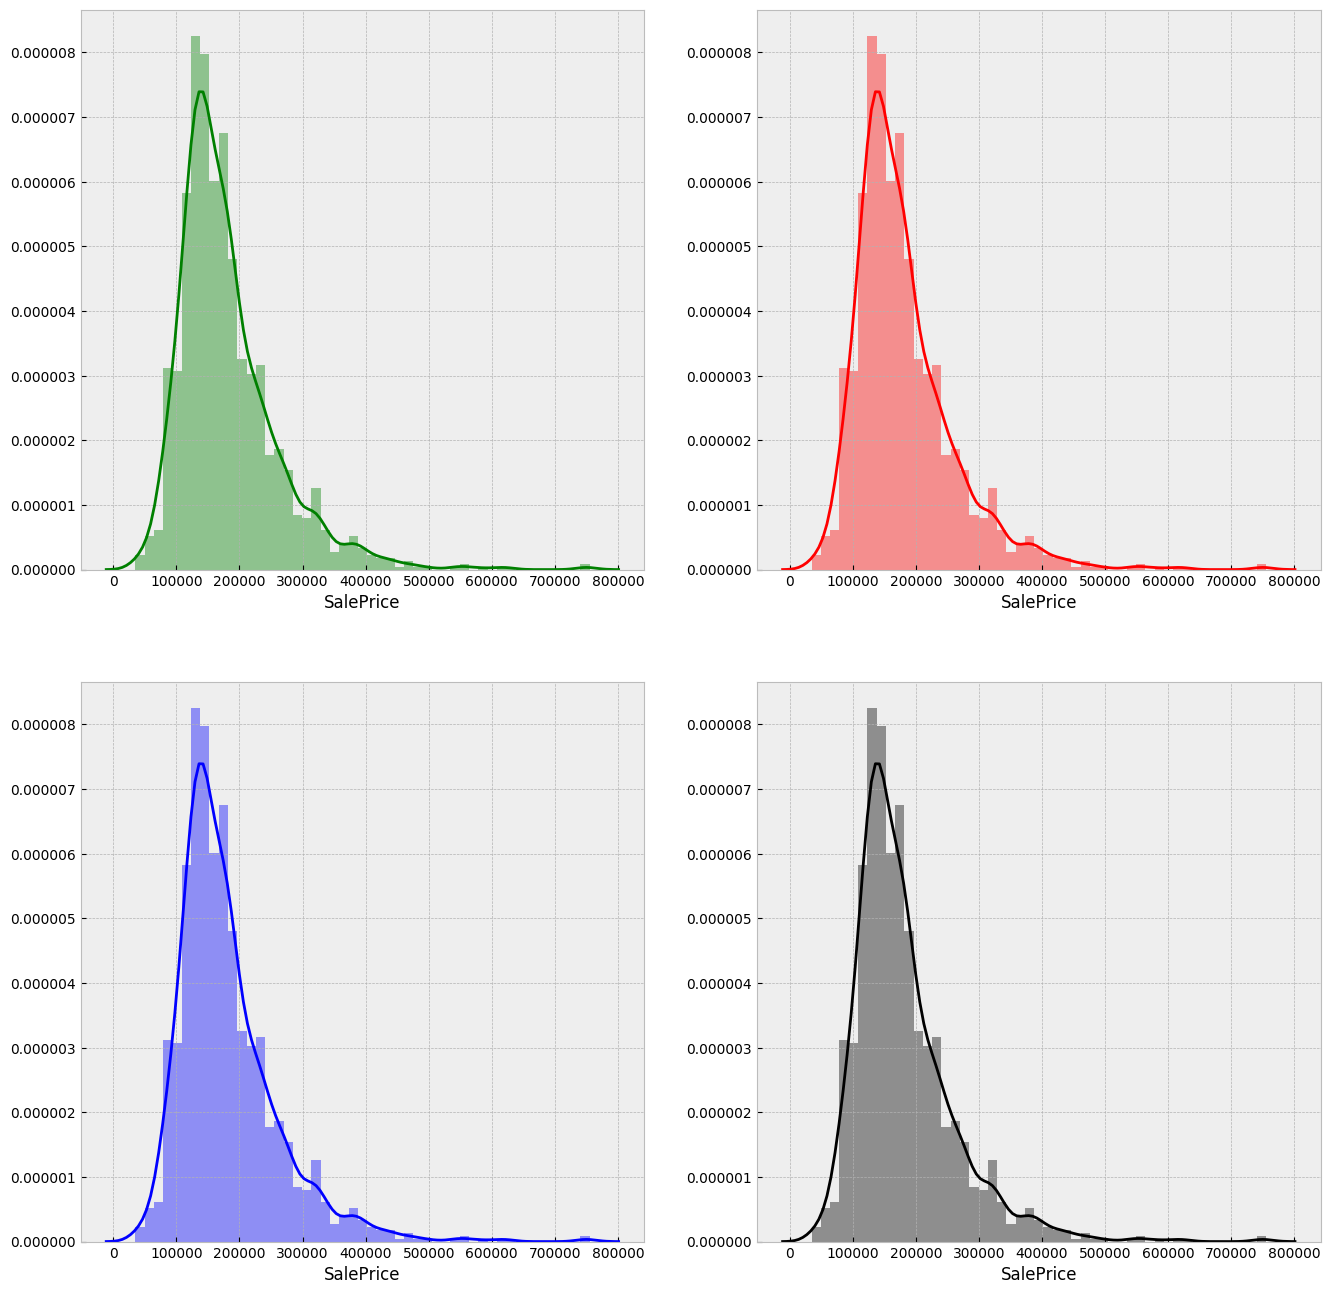

In [105]:
fig, ax = plt.subplots(2,2, figsize=(16,16))
plt.style.use('bmh') #dark_background
sns.distplot(train_data['SalePrice'],color='green',ax=ax[0][0])
sns.distplot(train_data['SalePrice'],color='red',ax=ax[0][1])
sns.distplot(train_data['SalePrice'],color='blue',ax=ax[1][0])
sns.distplot(train_data['SalePrice'],color='black',ax=ax[1][1])

# Data Preprocess

로그 변환 적용

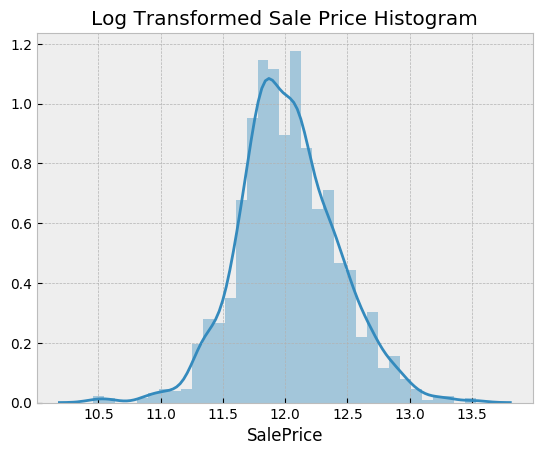

In [106]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(train_data['SalePrice'])
sns.distplot(log_SalePrice)

로그변환한 값을 데이터 프레임에 반환하자


TIP
- inplace=True : 기존 객체를 수정하는 방식, 디폴트:False

In [107]:
# SalePrice 로그 변환
original_SalePrice = train_data['SalePrice']
train_data['SalePrice']= np.log1p(train_data['SalePrice'])

# Id컬럼 Drop
train_data.drop(['Id'],axis=1,inplace=True)

# Null값 중앙값으로 대체
train_data.fillna(train_data.median(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = train_data.isnull().sum()[train_data.isnull().sum() > 0]
print(train_data.dtypes[null_column_count.index])

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


문자형만 빼고 다 삭제됨. 문자형 피처는 모두 원-핫 인코딩으로 변환하자.

In [111]:
print('수행 전 데이터 shape:',train_data.shape)
train_data_ohe = pd.get_dummies(train_data)
print('수행 후 데이터 shape:',train_data_ohe.shape)

null_column_count = train_data_ohe.isnull().sum()[train_data_ohe.isnull().sum()>0]
print(null_column_count)

수행 전 데이터 shape: (1460, 75)
수행 후 데이터 shape: (1460, 271)
Series([], dtype: int64)


In [113]:
train_data_ohe.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 271, dtype: int64

# 선형 회귀 모델 학습/예측/평가

rmse를 측정할 함수 생성

In [0]:
def get_rmse(model):
  pred = model.predict(X_test)
  mse= mean_squared_error(y_test,pred)
  rmse = np.sqrt(mse) #배열원소의 제곱근
  print(model.__class__.__name__,'로그 변환된 rmse:',np.round(rmse,3))
  return rmse

def get_rmses(models):
  rmses=[]
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses

선형 회귀 모데을 학습하고 예측, 평가해 보자

In [0]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = train_data_ohe['SalePrice']
X_features = train_data_ohe.drop('SalePrice',axis=1,inplace=False)
X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.2,
                                                 random_state=156)

In [120]:
# LinearRegression,Ridge,Lasso 학습,예측,평가
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 rmse: 0.132
Ridge 로그 변환된 rmse: 0.128
Lasso 로그 변환된 rmse: 0.176


[0.13191234333885035, 0.12750743346297386, 0.176295595090209]

라쏘 회귀의 경우 하이퍼파라미터의 조정이 필요한 것 같음.

우선 피처가 많으니 회귀 계수를 시각화해서 모델별로 어떠한 피처의 회귀 계수로 구성되는지 확인해 보자.

In [0]:
def get_top_bottom_coef(model,n=10):
  #coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명.
  coef = pd.Series(model.coef_,index=X_features.columns)

  # + 상위 10개,- 하위 10개의 회귀 계수를 추출해 반환.
  coef_high  = coef.sort_values(ascending=False).head(n)
  coef_low  = coef.sort_values(ascending=True).head(n)
  return coef_high,coef_low

In [0]:
def visualize_coefficient(models):
  # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
  fig,axs = plt.subplots(figsize=(14,6),nrows=1,ncols=3)
  fig.tight_layout()
  #입력 인자로 받은 list 객체인 models에서 차례로 moel을 추출해 회귀 계수 시각화
  for i_num,model in enumerate(models):
    # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
    coef_high,coef_low = get_top_bottom_coef(model)
    coef_concat = pd.concat([coef_high,coef_low])
    # ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
    axs[i_num].set_title(model.__class__.__name__+'Coeffiecents',size=10)
    axs[i_num].tick_params(axis='y',direction='in',pad=-120)
    
    for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
      label.set_fontsize(6)
    sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

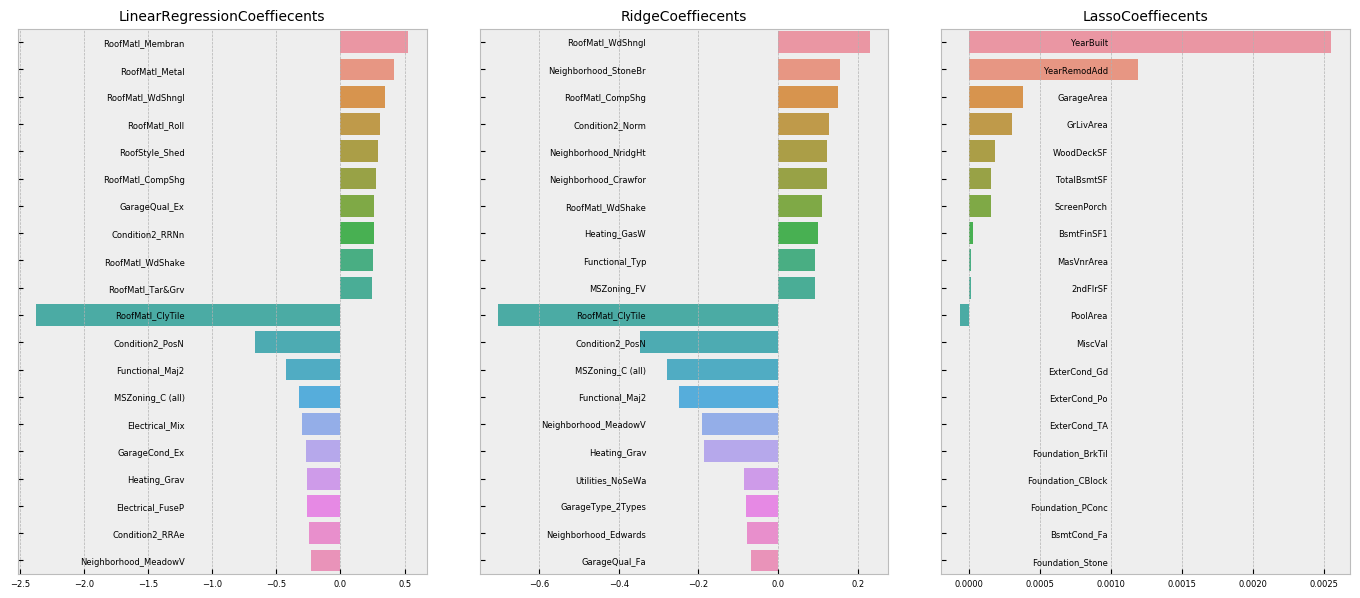

In [145]:
# 앞 예제에서 학습한 lr_reg,ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)